In [1]:
# This example show the use of ordinary least squares to estimate the parameters of a linear model
# The principle of this example is to generate samples from the parameters R of a reference model
# and to check that the solution S is close to these parameters R.
# The solution directly resolves the equation : A * S = Y
# Note that for a very large number of parameters, executing linsolve is more efficient (O3) than
# using the classical formula (A' * A)^-1 * A' * Y which must invert a matrix (O4)

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Parameters of the problem
R           = np.array([[1],[2]]) # Reference model: R is the expected solution A * R = Y
sigmaY      = 0.2                 # standard deviation of the noise applied to the observed values
N           = 100                 # Number of samples
seedinit    = 0                   # Initialization value for random generation

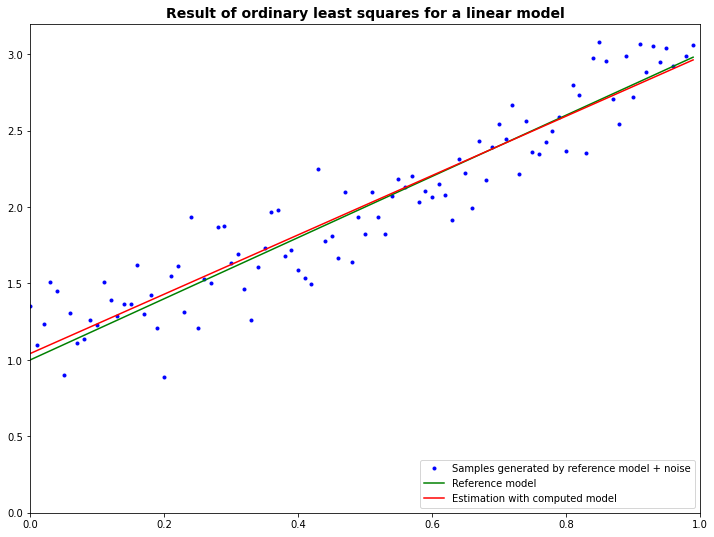

In [4]:
# Initializing the generator the control the reproducibility of the test
np.random.seed(seedinit)
# Generating the input values
X = np.arange(0, 1, 1.0/N, dtype=float).reshape(N, 1)
# Building the matrix of the equation: A X = Y
A = np.concatenate((np.ones((N, 1), dtype=float), X), axis=1)
# Generating observed values
Y = np.matmul(A, R) + sigmaY * np.random.randn(N, 1)
# Computing the solution is the classical formula of ordinary least squares S = (A' * A)^-1 * A' * Y
S = np.linalg.solve(np.matmul(np.transpose(A), A), np.matmul(np.transpose(A), Y))
# Computing an estimate based on the computed model
Z = np.matmul(A, S)
# Generating a figure to display the result
plt.figure(figsize=(12, 9))
plt.title('Result of ordinary least squares for a linear model', fontdict={'fontsize':14, 'fontweight':'bold'})
plt.axis([0, 1, 0, (R[0][0] + R[1][0] + sigmaY) ])
plt.plot(X, Y, 'b.', label='Samples generated by reference model + noise')
plt.plot(X, np.matmul(A, R), 'g', label='Reference model')
plt.plot(X, Z, 'r', label='Estimation with computed model')
plt.legend(loc='lower right')